In [ ]:
%%capture
!pip install category_encoders==2.*
!pip install pandas_profiling==2.*
!pip install ydata_profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from pandas_profiling import ProfileReport

<ipython-input-2-85def8cc9c3a>:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Bloomtech_Waterpump_Challenge

/content/gdrive/My Drive/Bloomtech_Waterpump_Challenge


In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/gdrive/My Drive/Bloomtech_Waterpump_Challenge"
!kaggle competitions download -c bloomtech-water-pump-challenge

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content/gdrive/My Drive/Bloomtech_Waterpump_Challenge. Or use the environment method.


In [ ]:
!unzip \*.zip && rm * .zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
!pwd

/content/gdrive/My Drive/Bloomtech_Waterpump_Challenge


In [ ]:
!ls

In [ ]:
# sample_submission = pd.read_csv("sample_submission.csv")
train_labels = pd.read_csv("/content/gdrive/MyDrive/Kaggle/train_labels.csv")
test_features = pd.read_csv("/content/gdrive/MyDrive/Kaggle/test_features.csv")
train_features = pd.read_csv("/content/gdrive/MyDrive/Kaggle/train_features.csv")

In [ ]:
train_labels.head()

id    status_group
0    454      functional
1    510      functional
2  14146  non functional
3  47410  non functional
4   1288  non functional

In [ ]:
train_features.head()

id  amount_tsh date_recorded funder  gps_height installer  longitude  \
0    454        50.0    2013-02-27   Dmdd        2092      DMDD  35.426020   
1    510         0.0    2011-03-17   Cmsr           0      Gove  35.510074   
2  14146         0.0    2011-07-10   Kkkt           0      KKKT  32.499866   
3  47410         0.0    2011-04-12    NaN           0       NaN  34.060484   
4   1288       300.0    2011-04-05     Ki        1023        Ki  37.032690   

   latitude                 wpt_name  num_private  ... payment_type  \
0 -4.227446                    Narmo            0  ...   per bucket   
1 -5.724555                   Lukali            0  ...    never pay   
2 -9.081222                 Mahakama            0  ...    never pay   
3 -8.830208  Shule Ya Msingi Chosi A            0  ...      monthly   
4 -6.040787                Kwa Mjowe            0  ...   on failure   

  water_quality quality_group      quantity  quantity_group        source  \
0          soft          good  insufficient    insufficient        spring   
1          soft          good        enough          enough  shallow well   
2          soft          good        enough          enough  shallow well   
3          soft          good  insufficient    insufficient         river   
4         salty         salty        enough          enough  shallow well   

    source_type  source_class     waterpoint_type waterpoint_type_group  
0        spring   groundwater  communal standpipe    communal standpipe  
1  shallow well   groundwater           hand pump             hand pump  
2  shallow well   groundwater               other                 other  
3    river/lake       surface  communal standpipe    communal standpipe  
4  shallow well   groundwater               other                 other  

[5 rows x 40 columns]

In [ ]:
test_features.head()

id  amount_tsh date_recorded                          funder  \
0  37098         0.0    2012-10-09  Rural Water Supply And Sanitat   
1  14530         0.0    2012-11-03   Halmashauri Ya Manispa Tabora   
2  62607        10.0    2013-02-25                   Siter Fransis   
3  46053         0.0    2011-08-13                            Kkkt   
4  47083        50.0    2013-02-08                        Wateraid   

   gps_height                      installer  longitude  latitude   wpt_name  \
0           0                            DWE  31.985658 -3.596360     Kasela   
1           0  Halmashauri ya manispa tabora  32.832815 -4.944937    Mbugani   
2        1675                            DWE  35.488289 -4.242048  Kwa Leosi   
3           0                           KKKT  33.140828 -9.059386      Jangi   
4        1109                           SEMA  34.217077 -4.430529      Mkima   

   num_private  ... payment_type water_quality quality_group      quantity  \
0            0  ...      unknown          soft          good           dry   
1            0  ...    never pay         milky         milky  insufficient   
2            0  ...   per bucket          soft          good  insufficient   
3            0  ...    never pay          soft          good      seasonal   
4            0  ...   per bucket          soft          good        enough   

   quantity_group        source   source_type  source_class  \
0             dry  shallow well  shallow well   groundwater   
1    insufficient  shallow well  shallow well   groundwater   
2    insufficient        spring        spring   groundwater   
3        seasonal  shallow well  shallow well   groundwater   
4          enough   machine dbh      borehole   groundwater   

               waterpoint_type waterpoint_type_group  
0                        other                 other  
1                    hand pump             hand pump  
2           communal standpipe    communal standpipe  
3                    hand pump             hand pump  
4  communal standpipe multiple    communal standpipe  

[5 rows x 40 columns]

In [ ]:
#merge features
train = pd.merge(train_features, train_labels)
X_test = pd.read_csv("/content/gdrive/MyDrive/Kaggle/test_features.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47520 entries, 0 to 47519
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     47520 non-null  int64  
 1   amount_tsh             47520 non-null  float64
 2   date_recorded          47520 non-null  object 
 3   funder                 44643 non-null  object 
 4   gps_height             47520 non-null  int64  
 5   installer              44631 non-null  object 
 6   longitude              47520 non-null  float64
 7   latitude               47520 non-null  float64
 8   wpt_name               47519 non-null  object 
 9   num_private            47520 non-null  int64  
 10  basin                  47520 non-null  object 
 11  subvillage             47224 non-null  object 
 12  region                 47520 non-null  object 
 13  region_code            47520 non-null  int64  
 14  district_code          47520 non-null  int64  
 15  lg

In [ ]:
ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
train = pd.merge(train_features, train_labels)
X_test = test_features

def wrangle(df):

  #Set the index to "id"
  df.set_index("id", inplace=True)

  #Drop Constant Column
  df.drop(columns="recorded_by", inplace =True)

  #Drop Duplicate Column
  df.drop(columns="quantity_group", inplace=True)

  #Drop High Cardinality Columns
  threshold = 100
  cols_to_drop = [col for col in df.select_dtypes("object") if df[col].nunique() > threshold]
  df.drop(columns=cols_to_drop, inplace=True)

  #Drop columns with high proportion of zeros
  df.drop(columns="num_private", inplace=True)

  return df

train = wrangle(train)
X_test = wrangle(X_test)

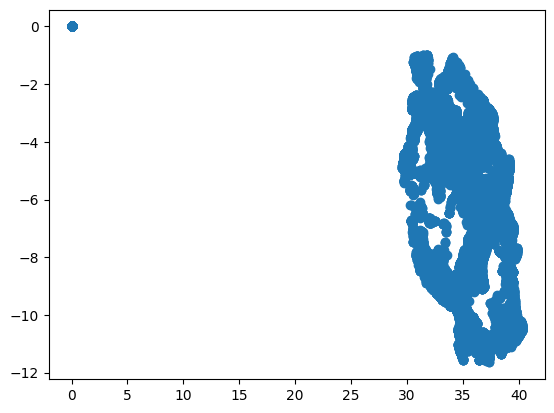

In [ ]:
#null island!
#bunch of data coordinates at 0,0

plt.scatter(train["longitude"], train["latitude"])
plt.show()

In [ ]:
train[train["latitude"] == 0]

Empty DataFrame
Columns: [amount_tsh, gps_height, longitude, latitude, basin, region, region_code, district_code, population, public_meeting, scheme_management, permit, construction_year, extraction_type, extraction_type_group, extraction_type_class, management, management_group, payment, payment_type, water_quality, quality_group, quantity, source, source_type, source_class, waterpoint_type, waterpoint_type_group, status_group]
Index: []

[0 rows x 29 columns]

In [ ]:
train[train["longitude"] == 0]

amount_tsh  gps_height  longitude      latitude            basin  \
id                                                                        
18191         0.0           0        0.0 -2.000000e-08    Lake Victoria   
59340         0.0           0        0.0 -2.000000e-08    Lake Victoria   
9535          0.0           0        0.0 -2.000000e-08    Lake Victoria   
35395         0.0           0        0.0 -2.000000e-08    Lake Victoria   
56429         0.0           0        0.0 -2.000000e-08    Lake Victoria   
...           ...         ...        ...           ...              ...   
30428         0.0           0        0.0 -2.000000e-08    Lake Victoria   
60259         0.0           0        0.0 -2.000000e-08    Lake Victoria   
55213         0.0           0        0.0 -2.000000e-08    Lake Victoria   
30192         0.0           0        0.0 -2.000000e-08  Lake Tanganyika   
3854          0.0           0        0.0 -2.000000e-08    Lake Victoria   

          region  region_code  district_code  population public_meeting  ...  \
id                                                                       ...   
18191  Shinyanga           17              1           0           True  ...   
59340  Shinyanga           17              1           0           True  ...   
9535   Shinyanga           17              1           0            NaN  ...   
35395  Shinyanga           17              1           0            NaN  ...   
56429  Shinyanga           17              1           0           True  ...   
...          ...          ...            ...         ...            ...  ...   
30428  Shinyanga           17              1           0            NaN  ...   
60259     Mwanza           19              6           0           True  ...   
55213     Mwanza           19              2           0           True  ...   
30192     Mwanza           19              6           0           True  ...   
3854      Mwanza           17              1           0            NaN  ...   

      payment_type water_quality  quality_group      quantity  \
id                                                              
18191        other          soft           good  insufficient   
59340    never pay          soft           good        enough   
9535       unknown       unknown        unknown        enough   
35395      unknown          soft           good        enough   
56429        other          soft           good      seasonal   
...            ...           ...            ...           ...   
30428      unknown          soft           good        enough   
60259   per bucket          soft           good  insufficient   
55213    never pay          soft           good        enough   
30192    never pay          soft           good  insufficient   
3854       unknown          soft           good        enough   

                     source           source_type source_class  \
id                                                               
18191          shallow well          shallow well  groundwater   
59340          shallow well          shallow well  groundwater   
9535           shallow well          shallow well  groundwater   
35395          shallow well          shallow well  groundwater   
56429  rainwater harvesting  rainwater harvesting      surface   
...                     ...                   ...          ...   
30428          shallow well          shallow well  groundwater   
60259          shallow well          shallow well  groundwater   
55213          shallow well          shallow well  groundwater   
30192          shallow well          shallow well  groundwater   
3854           shallow well          shallow well  groundwater   

          waterpoint_type waterpoint_type_group             status_group  
id                                                                        
18191           hand pump             hand pump  functional needs repair  
59340           hand pump             hand pump             

In [ ]:
train.T.duplicated()

amount_tsh               False
gps_height               False
longitude                False
latitude                 False
basin                    False
region                   False
region_code              False
district_code            False
population               False
public_meeting           False
scheme_management        False
permit                   False
construction_year        False
extraction_type          False
extraction_type_group    False
extraction_type_class    False
management               False
management_group         False
payment                  False
payment_type             False
water_quality            False
quality_group            False
quantity                 False
source                   False
source_type              False
source_class             False
waterpoint_type          False
waterpoint_type_group    False
status_group             False
dtype: bool

In [ ]:
#Now we can split the data

status_group = "status_group"
y= train[status_group]
X= train.drop(columns=status_group)

In [ ]:
#Training-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

In [ ]:
#Establish Baseline
y_train.value_counts(normalize=True)

status_group
functional                 0.544087
non functional             0.381866
functional needs repair    0.074048
Name: proportion, dtype: float64

In [ ]:
print("baseline accuracy", y_train.value_counts(normalize=True).max())

baseline accuracy 0.5440867003367004


In [ ]:
#Build Models

#First model - Logistic Regression
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy="mean"),
    StandardScaler(),
    LogisticRegression(max_iter=200)
)

model_lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['basin', 'region', 'public_meeting',
                                     'scheme_management', 'permit',
                                     'extraction_type', 'extraction_type_group',
                                     'extraction_type_class', 'management',
                                     'management_group', 'payment',
                                     'payment_type', 'water_quality',
                                     'quality_group', 'quantity', 'source',
                                     'source_type', 'source_class',
                                     'waterpoint_type',
                                     'waterpoint_type_group'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=200))])

In [ ]:
#Second model - Decision Tree Classifier
model_dt = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    DecisionTreeClassifier(random_state=42, max_depth=16)
)

model_dt.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['basin', 'region', 'public_meeting',
                                      'scheme_management', 'permit',
                                      'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity', 'source',
                                      'source_type', 'source_class',
                                      'waterpoint_type',
                                      'waterpoin...
communal standpipe             2
communal standpipe multiple    3
other                          4
improved spring                5
cattle trough                  6
dam                            7
NaN                           -2
dtype: int64},
                                         {'col': 'waterpoint_type_group',
                                          'data_type': dtype('O'),
                                          'mapping': hand pump             1
communal standpipe    2
other                 3
improved spring       4
cattle trough         5
dam                   6
NaN                  -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=16, random_state=42))])

In [ ]:
#Check metrics
print("model_lr accuracy score for training", accuracy_score(y_train, model_lr.predict(X_train)))
print("model_lr accuracy score for val", accuracy_score(y_val, model_lr.predict(X_val)))

model_lr accuracy score for training 0.7337962962962963
model_lr accuracy score for val 0.7361111111111112


In [ ]:

print("model_dt accuracy score for training", accuracy_score(y_train, model_dt.predict(X_train)))
print("model_dt accuracy score for val", accuracy_score(y_val, model_dt.predict(X_val)))

model_dt accuracy score for training 0.8780776515151515
model_dt accuracy score for val 0.7716750841750841


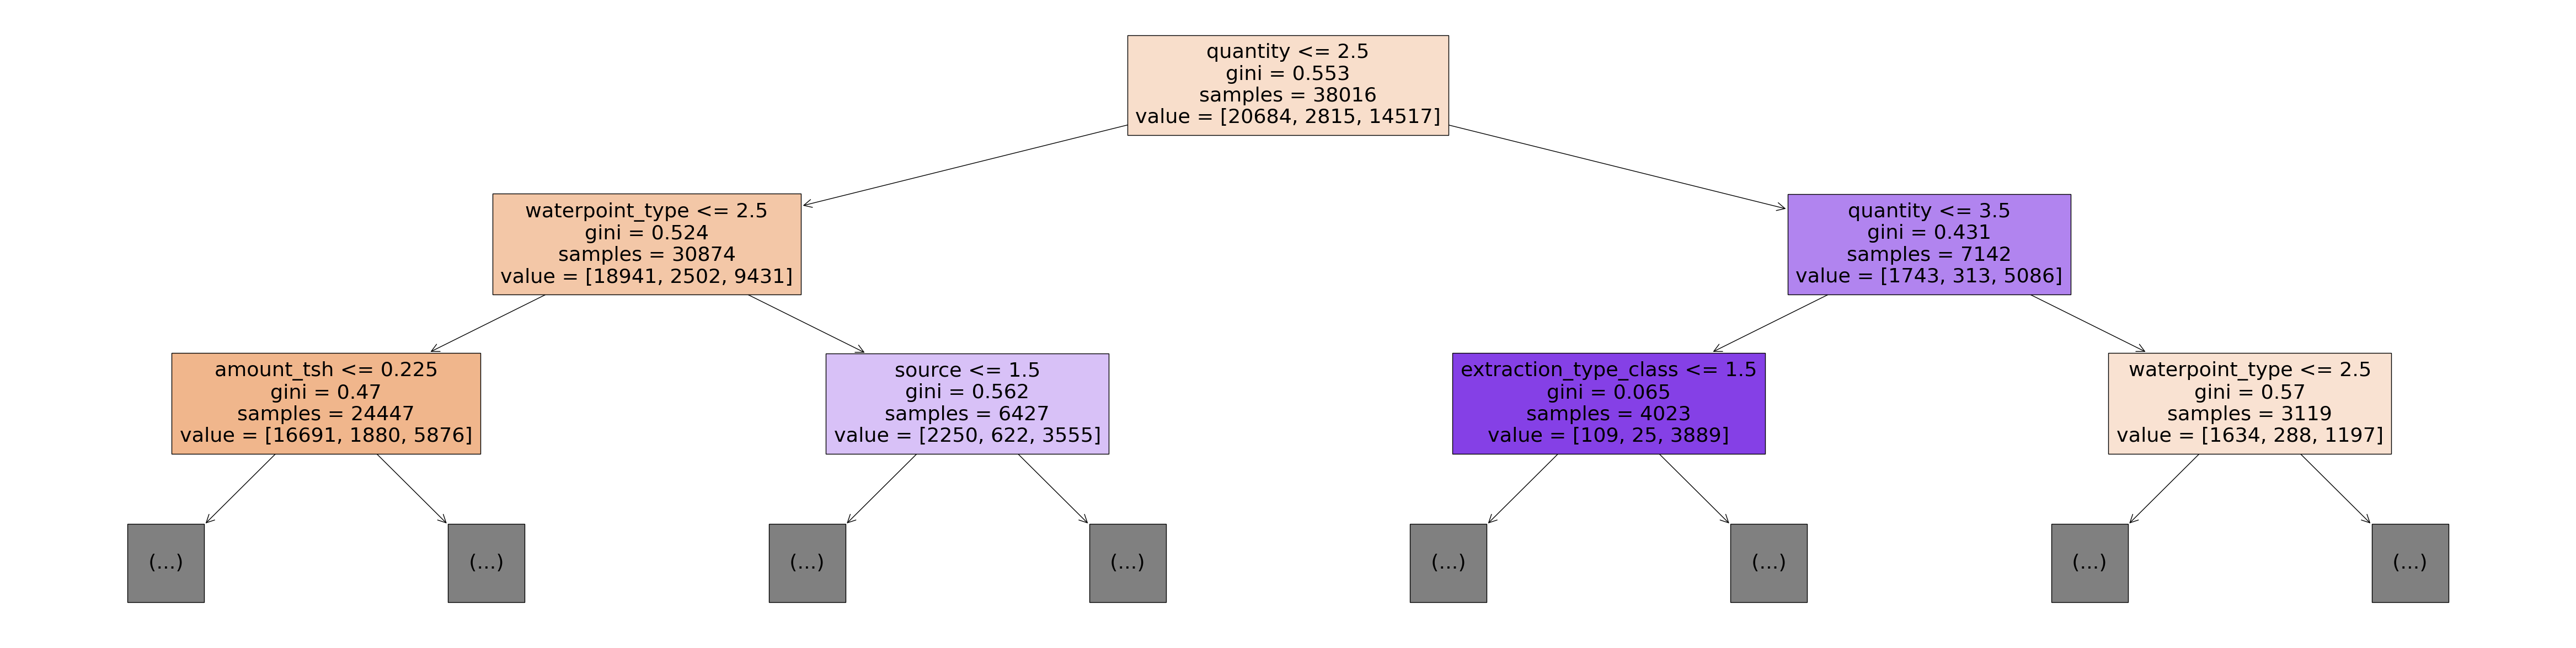

In [ ]:
plt.figure(figsize=(60,15))
plot_tree(model_dt.named_steps["decisiontreeclassifier"], max_depth=2, feature_names = X_train.columns, filled=True);

In [ ]:
#Tune the model
depths = range(5,20,2)
list(depths)

#Very similar steps to how we tuned alpha for ridge regression

train_acc = []
val_acc = []

for depth in depths:
  tree_model = make_pipeline(
      OrdinalEncoder(),
      SimpleImputer(),
      DecisionTreeClassifier(max_depth=depth,random_state=42)
  )

  tree_model.fit(X_train, y_train)
  train_acc.append(tree_model.score(X_train, y_train))
  val_acc.append(tree_model.score(X_val,y_val))

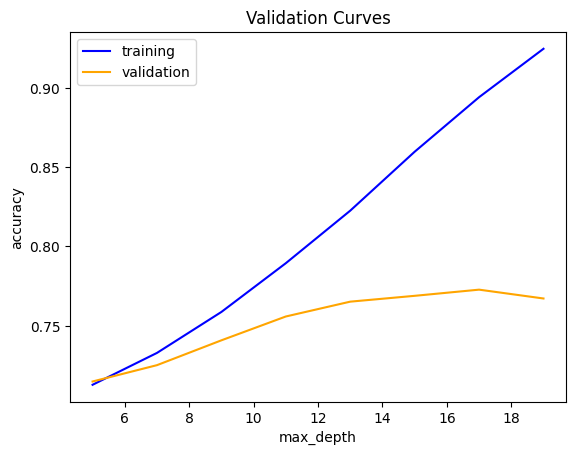

In [ ]:
#Plot Validation Curves
plt.plot(depths, train_acc, color="blue", label="training")
plt.plot(depths, val_acc, color="orange", label="validation")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("Validation Curves")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


Text(0.5, 0, 'gini importance')

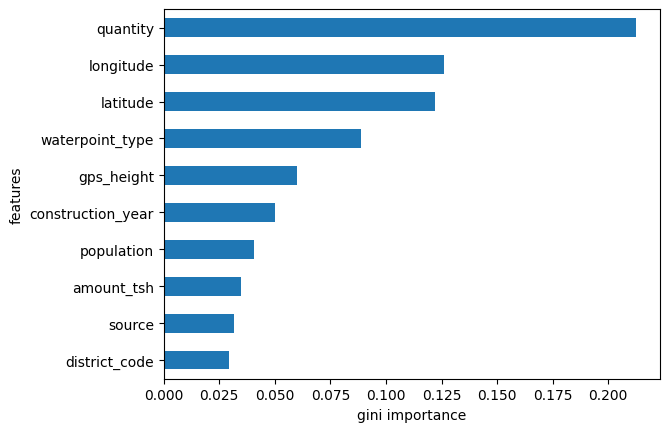

In [ ]:
#Communicate Results

#Gini importtance
features = model_dt.named_steps["ordinalencoder"].get_feature_names()
gini_importances= model_dt.named_steps["decisiontreeclassifier"].feature_importances_
pd.Series(data=gini_importances, index=features).sort_values(key=abs).tail(10).plot(kind="barh")
plt.ylabel("features")
plt.xlabel("gini importance")

In [ ]:
#Submit to Kaggle
predictions = pd.DataFrame(data=model_lr.predict(X_test), index=X_test.index)

In [ ]:
predictions.columns=["status_group"]

In [ ]:
predictions

status_group
id                   
37098  non functional
14530      functional
62607      functional
46053  non functional
47083      functional
...               ...
26092      functional
919        functional
47444  non functional
61128      functional
8075       functional

[11880 rows x 1 columns]

In [ ]:
#Generate CSV
predictions.to_csv("new_submission.csv")

In [ ]:
#Download
from google.colab import files
files.download("new_submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>